In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

In [3]:
df = pd.read_csv('/Users/zakg04/Documents/HBC_lab/BOOST/Main/TaskLogic/data/test/test-7005/processed/VNB/7005_VNB_A.csv')

test = df[df['block']=='test']

In [4]:

# Plotting the circular bar graph
def plot_circular_bar_graph(percentages, name):
    startangle = 90
    colors = ['#4393E5', '#43BAE5', '#7AE6EA', '#E5A443']
    
    # Convert data to fit the polar axis
    ys = [i *1.1 for i in range(len(percentages))]   # One bar for each block
    left = (startangle * pi * 2) / 360  # This is to control where the bar starts

    # Figure and polar axis
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = plt.subplot(projection='polar')

    # Plot bars and points at the end to make them round
    for i, (block, percentage) in enumerate(percentages.items()):
        ax.barh(ys[i], percentage * 2 * pi, left=left, height=0.5, color=colors[i % len(colors)], label=block)
        ax.text(percentage + left + 0.02, ys[i], f'{percentage:.0%}', va='center', ha='left', color='black', fontsize=12)

    plt.ylim(-1, len(percentages))

    # Custom legend
    ax.legend(loc='center', frameon=True) 

    # Clear ticks and spines
    plt.xticks([])
    plt.yticks([])
    ax.spines.clear()
    plt.title(name, fontsize=15, pad=20, color="black")

    plt.show()

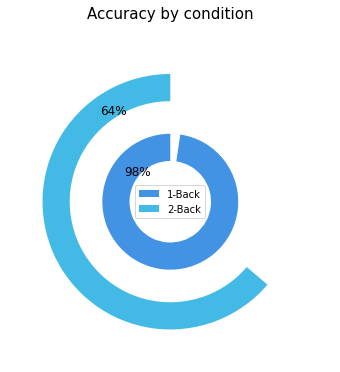

In [5]:
#plot accuracy by condition on circular bar graph
correct_by_condition = test.groupby('condition')['correct'].mean()

plot_circular_bar_graph(correct_by_condition, 'Accuracy by condition')

/var/folders/1w/l9hx8l952r57k_qmjhw7qc500000gn/T/ipykernel_37757/2716656357.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='condition', y='response_time', data=test, showfliers=False, palette='viridis', linewidth=1)
/var/folders/1w/l9hx8l952r57k_qmjhw7qc500000gn/T/ipykernel_37757/2716656357.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(x='condition', y='response_time', data=test, jitter=True, color='black', alpha=0.5, hue='correct')


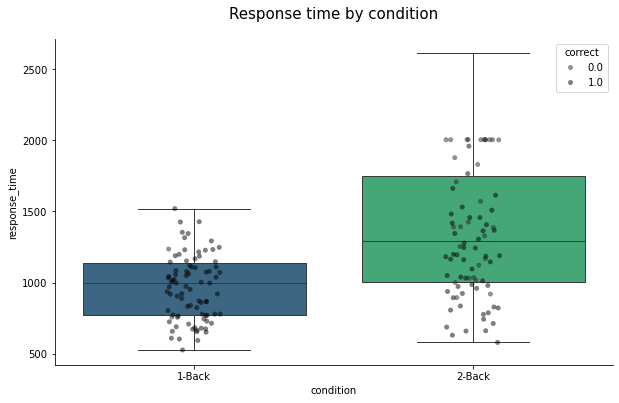

In [11]:
#create a scatterplot of response_time by condition and create transparent box and whiskers, use transparency to show density, add color coding to show accuracy
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='response_time', data=test, showfliers=False, palette='viridis', linewidth=1)
sns.stripplot(x='condition', y='response_time', data=test, jitter=True, color='black', alpha=0.5, hue='correct')
sns.despine()
plt.title('Response time by condition', fontsize=15, pad=20)
plt.show()

In [7]:
## ADD HUE FOR ACC